In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Data HTTT/AI/CarDamageUnderstanding'

/content/drive/.shortcut-targets-by-id/18pZkgF7n0vnYrFj3-nDNoVUCaZTlEvqo/Data HTTT/AI/CarDamageUnderstanding


In [ ]:
!python utils.py

num label:  162
11362 - 2841


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 KB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [ ]:
!pip install pycls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 800.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 19.0 MB/s eta 0:00:00


### **Train**

In [ ]:
!python main.py --model mobilenetv2 --batch-size 64 --epochs 100 --distillation-type soft --output_dir ./work_dirs/mobilenetv2_regnetx_v2/ --resume ./work_dirs/mobilenetv2_regnetx_v2/checkpoint.pth

Not using distributed mode
Namespace(ThreeAugment=False, aa='rand-m9-mstd0.5-inc1', batch_size=64, bce_loss=False, clip_grad=None, color_jitter=0.3, cooldown_epochs=10, cutmix=1.0, cutmix_minmax=None, data_path='./dent_data/', decay_epochs=30, decay_rate=0.1, device='cuda', dist_eval=False, distillation_alpha=0.5, distillation_tau=1.0, distillation_type='soft', distributed=False, drop=0.0, drop_path=0.1, epochs=100, eval=False, feature_extract=True, input_size=224, lr=0.0005, lr_noise=None, lr_noise_pct=0.67, lr_noise_std=1.0, min_lr=1e-05, mixup=0.8, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='mobilenetv2', model_ema=True, model_ema_decay=0.99996, model_ema_force_cpu=False, momentum=0.9, num_workers=10, opt='adamw', opt_betas=None, opt_eps=1e-08, output_dir='./work_dirs/mobilenetv2_regnetx_v2/', patience_epochs=10, pin_mem=True, recount=1, remode='pixel', reprob=0.25, resume='./work_dirs/mobilenetv2_regnetx_v2/checkpoint.pth', sched='cosine', seed=0, smoothing=0.

### **Visualize log**

In [ ]:
import torch

checkpoint = torch.load("./work_dirs/mobilenetv2_regnetx_v2/best_checkpoint.pth", map_location='cpu')
print(checkpoint['epoch'])

91


In [ ]:
import json

with open("./work_dirs/mobilenetv2_regnetx_v2/log.txt", "r") as f:
  logs = []
  for line in f:
    log = json.loads(line)
    logs.append(log)

In [ ]:
import pandas as pd

logs_df = pd.DataFrame(logs)
logs_df

,train_lr,train_loss,test_loss,test_acc1,test_acc5,epoch,n_parameters
0,1.000000e-06,2.583990,5.111456,0.633580,3.907075,0,2431394
1,1.000000e-06,2.566855,5.076040,0.774375,4.822246,1,2431394
2,1.330000e-05,2.506917,4.635905,9.609293,23.864837,2,2431394
3,2.560000e-05,2.375401,3.841731,23.759240,48.292855,3,2431394
4,3.790000e-05,2.213137,3.049242,36.923619,64.413940,4,2431394
...,...,...,...,...,...,...,...
94,1.046496e-05,1.446520,0.850482,85.322072,96.972899,95,2431394
95,1.032318e-05,1.398929,0.824037,85.322073,96.867303,96,2431394
96,1.020699e-05,1.426667,0.849166,85.498067,96.867303,97,2431394
97,1.011650e-05,1.405867,0.796377,85.286874,97.043298,98,2431394


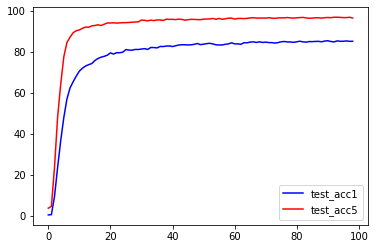

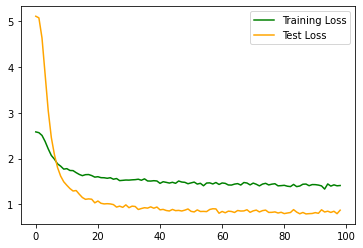

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(logs_df)), logs_df["test_acc1"], "b", label="test_acc1")
plt.plot(range(len(logs_df)), logs_df["test_acc5"], "r", label="test_acc5")
plt.legend()

plt.figure()

plt.plot(range(len(logs_df)), logs_df["train_loss"], "g", label="Training Loss")
plt.plot(range(len(logs_df)), logs_df["test_loss"], "orange", label="Test Loss")
plt.legend()

plt.show()



### **Covert to torch script**

In [ ]:
import torch

from model import initialize_model
model, input_size = initialize_model('mobilenetv2', 162, False, use_pretrained=False)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
checkpoint = torch.load("./work_dirs/mobilenetv2_regnetx_v2/best_checkpoint.pth", map_location='cpu')

model.load_state_dict(checkpoint['model'])


model.eval()

<All keys matched successfully>

In [ ]:
from torch.utils.mobile_optimizer import optimize_for_mobile


scripted_module = torch.jit.script(model)
# Export full jit version model (not compatible mobile interpreter), leave it here for comparison
scripted_module.save("mobilenetv2.pt")
# Export mobile interpreter version model (compatible with mobile interpreter)
optimized_scripted_module = optimize_for_mobile(scripted_module)
optimized_scripted_module._save_for_lite_interpreter("mobilenetv2.ptl")

### **Eval**

In [ ]:
import pickle
with open('dataset.pkl', 'rb') as file:
      train_x, val_x, train_y, val_y = pickle.load(file)


In [ ]:
import os
import glob
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pickle
import io
import time
from collections import defaultdict, deque
import datetime

import torch
import torch.distributed as dist
from glob import glob

def makelabel2num():
    label = os.listdir('./datasets/Plants/Cây công nghiệp/') \
    + os.listdir('./datasets/Plants/Cây nông nghiệp/') \
    + os.listdir('./datasets/Plants/flower/') \
    + os.listdir('./datasets/Animals/Birds/') \
    + os.listdir('./datasets/Animals/Landing Animals/') \
    + os.listdir('./datasets/Animals/Marsupials/') \
    + os.listdir('./datasets/Animals/Zodiac/') \
    + os.listdir('./datasets/Animals/Insects/')

    label2num = {x:idx for idx, x in enumerate(label)}
    num2label = {v:k for k, v in label2num.items()}

    return label2num, num2label

label2num, num2label = makelabel2num()

num label:  162


In [ ]:
import os
import pickle
from traceback import print_exception

from torchvision import datasets, transforms
from torchvision.datasets.folder import ImageFolder, default_loader

from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.data import create_transform

class DentDataset(ImageFolder):
    def __init__(self, 
                root, 
                train=True, 
                year=2022, 
                transform=None, 
                target_transform=None,
                num_classes = 162,
                option='train',
                loader=default_loader):
        self.root = root
        self.transform = transform
        self.loader = loader
        self.target_transform = target_transform
        self.year = year
        self.nb_classes = num_classes
        self.option = option

        self.samples = []
        with open('dataset.pkl', 'rb') as file:
            train_x, val_x, train_y, val_y = pickle.load(file)
        
        if self.option == 'train':
            for idx in range(len(train_x)):
                self.samples.append((train_x[idx], train_y[idx]))
        elif self.option == 'val':
            for idx in range(len(val_x)):
                self.samples.append((val_x[idx], val_y[idx]))
        else:
            print('Error to load data.')
        
    # __getitem__ and __len__ inherited from ImageFolder
        


def build_transform(is_train):
    resize_im = 224 > 32
    if is_train:
        print('Train transform')
        transform = create_transform(
            input_size=224,
            is_training=True,
            color_jitter=0.3,
            auto_augment='rand-m9-mstd0.5-inc1',
            interpolation='bicubic',
            re_prob=0.25,
            re_mode='pixel',
            re_count=1,
            mean=IMAGENET_DEFAULT_MEAN,
            std=IMAGENET_DEFAULT_STD,
        )

        if not resize_im:
            transform.transforms[0] = transforms.RandomCrop(
                224, padding=4
            )

        return transform
    
    print('Validation transform')
    t = []
    if resize_im:
        size = int((256 / 224) * 224)
        t.append(
            transforms.Resize(size, interpolation=3),  # to maintain same ratio w.r.t. 224 images
        )
        t.append(transforms.CenterCrop(224))

    t.append(transforms.ToTensor())
    t.append(transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD))
    return transforms.Compose(t)


def build_dataset(is_train):
    transforms = build_transform(is_train)

    option = 'train' if is_train else 'val'
    dataset = DentDataset('./dent_data/', train=is_train, transform=transforms, option=option)
    nb_classes = dataset.nb_classes

    return dataset, nb_classes
        
    

dataset_val, _ = build_dataset(is_train=False)
sampler_val = torch.utils.data.SequentialSampler(dataset_val)
data_loader_val = torch.utils.data.DataLoader(
    dataset_val, sampler=sampler_val,
    batch_size=int(1.5 * 64),
    num_workers=10,
    pin_memory=True,
    drop_last=False
)

Validation transform


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import math
import sys
from typing import Iterable, Optional

import torch
import numpy as np

from timm.data import Mixup
from timm.utils import accuracy, ModelEma

from losses import DistillationLoss
import utils

@torch.no_grad()
def evaluate(data_loader, model, device):
    criterion = torch.nn.CrossEntropyLoss()

    metric_logger = utils.MetricLogger(delimiter="  ")
    header = 'Test:'
    
    predicts = []
    labels = []
    confusion_matrix = np.zeros((162, 162))

    # switch to evaluation mode
    model.eval()

    for images, target in metric_logger.log_every(data_loader, 10, header):
        images = images.to(device, non_blocking=True)
        target = target.to(device, non_blocking=True)

        labels.append(target)

        # compute output
        with torch.cuda.amp.autocast():
            outputs = model(images)
            predicts.append(outputs)
            _, preds = torch.max(outputs, 1)
        for t, p in zip(target.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

        acc1, acc5 = accuracy(outputs, target, topk=(1, 5))

        batch_size = images.shape[0]
        metric_logger.meters['acc1'].update(acc1.item(), n=batch_size)
        metric_logger.meters['acc5'].update(acc5.item(), n=batch_size)
   
    return predicts, labels, confusion_matrix


device = torch.device('cuda')
model.to(device)
predicts, labels, confusion_matrix = evaluate(data_loader_val, model, device)


Test:  [ 0/30]  eta: 0:17:37  acc1: 83.3333 (83.3333)  acc5: 96.8750 (96.8750)  time: 35.2465  data: 35.0886  max mem: 736


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test:  [10/30]  eta: 0:02:10  acc1: 86.4583 (85.7008)  acc5: 96.8750 (96.6856)  time: 6.5225  data: 6.3758  max mem: 736


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Test:  [20/30]  eta: 0:00:48  acc1: 86.4583 (86.0615)  acc5: 96.8750 (96.9246)  time: 3.3111  data: 3.1743  max mem: 736
Test:  [29/30]  eta: 0:00:03  acc1: 86.4583 (85.5685)  acc5: 96.8750 (96.9025)  time: 2.9004  data: 2.7954  max mem: 736
Test: Total time: 0:01:53 (3.7965 s / it)


Text(0.5, 788.0, 'Predicted label')

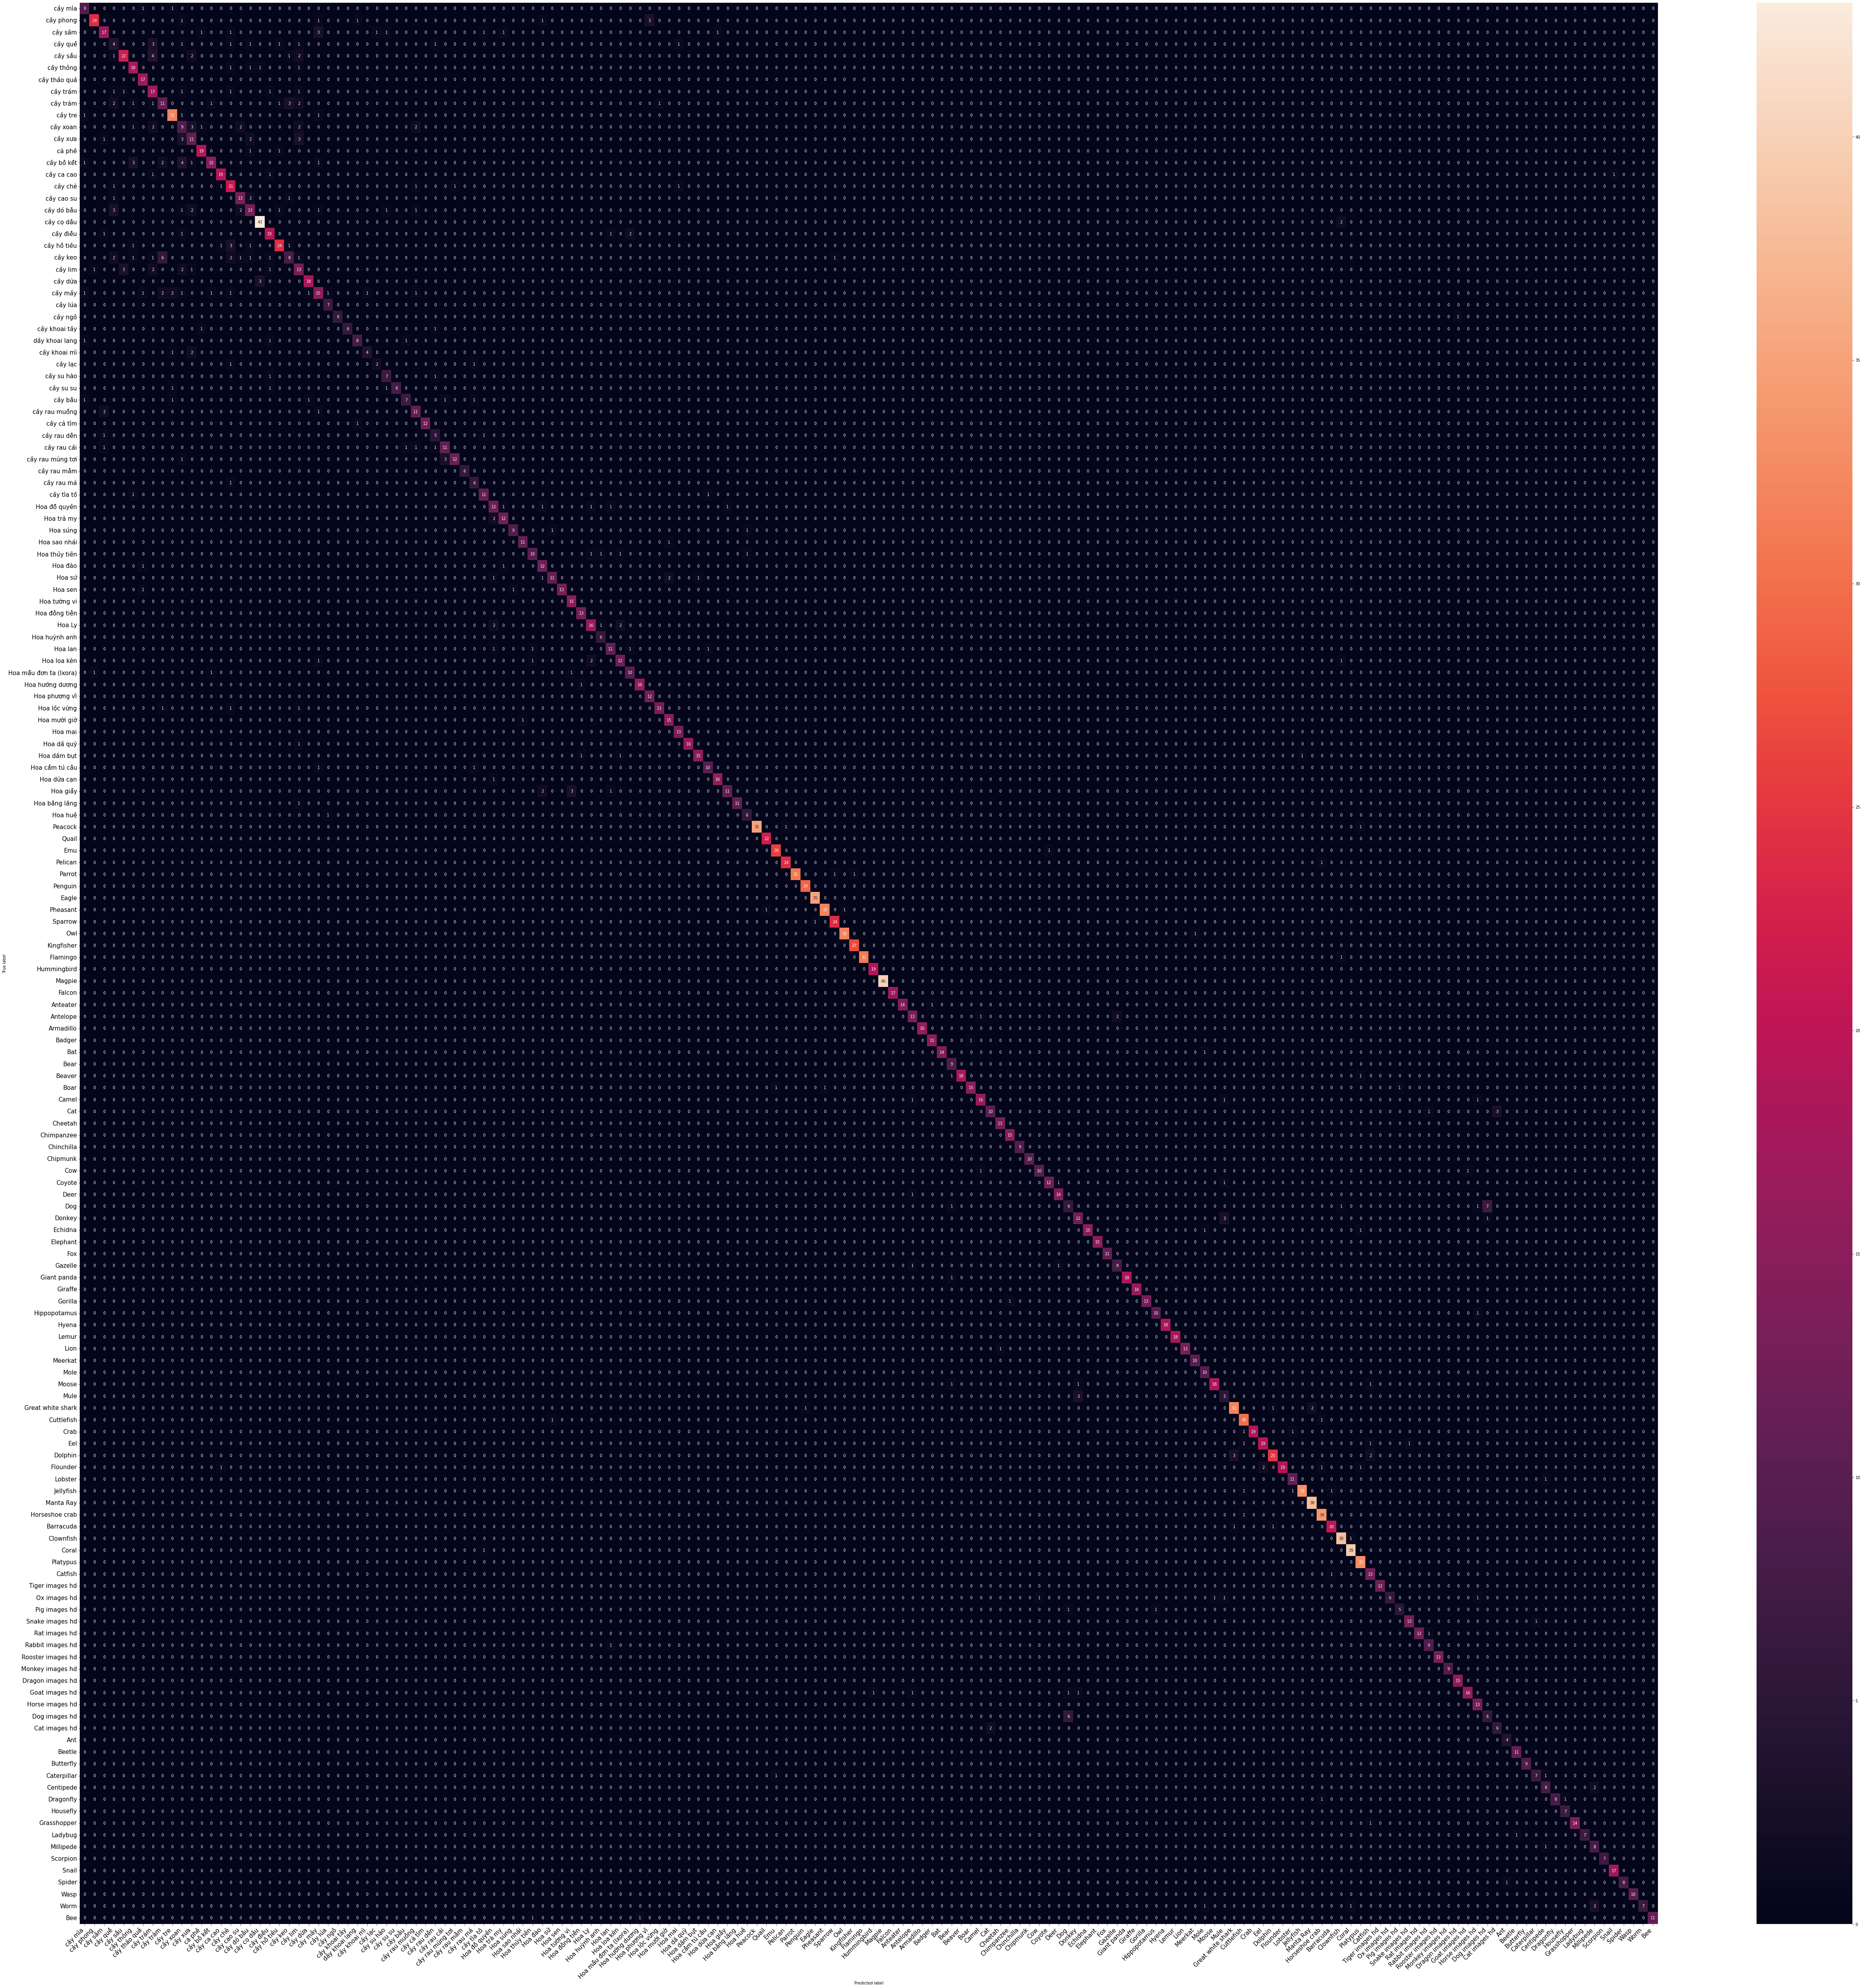

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(90,90))

class_names = list(label2num.keys())
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 428.0, 'Predicted label')

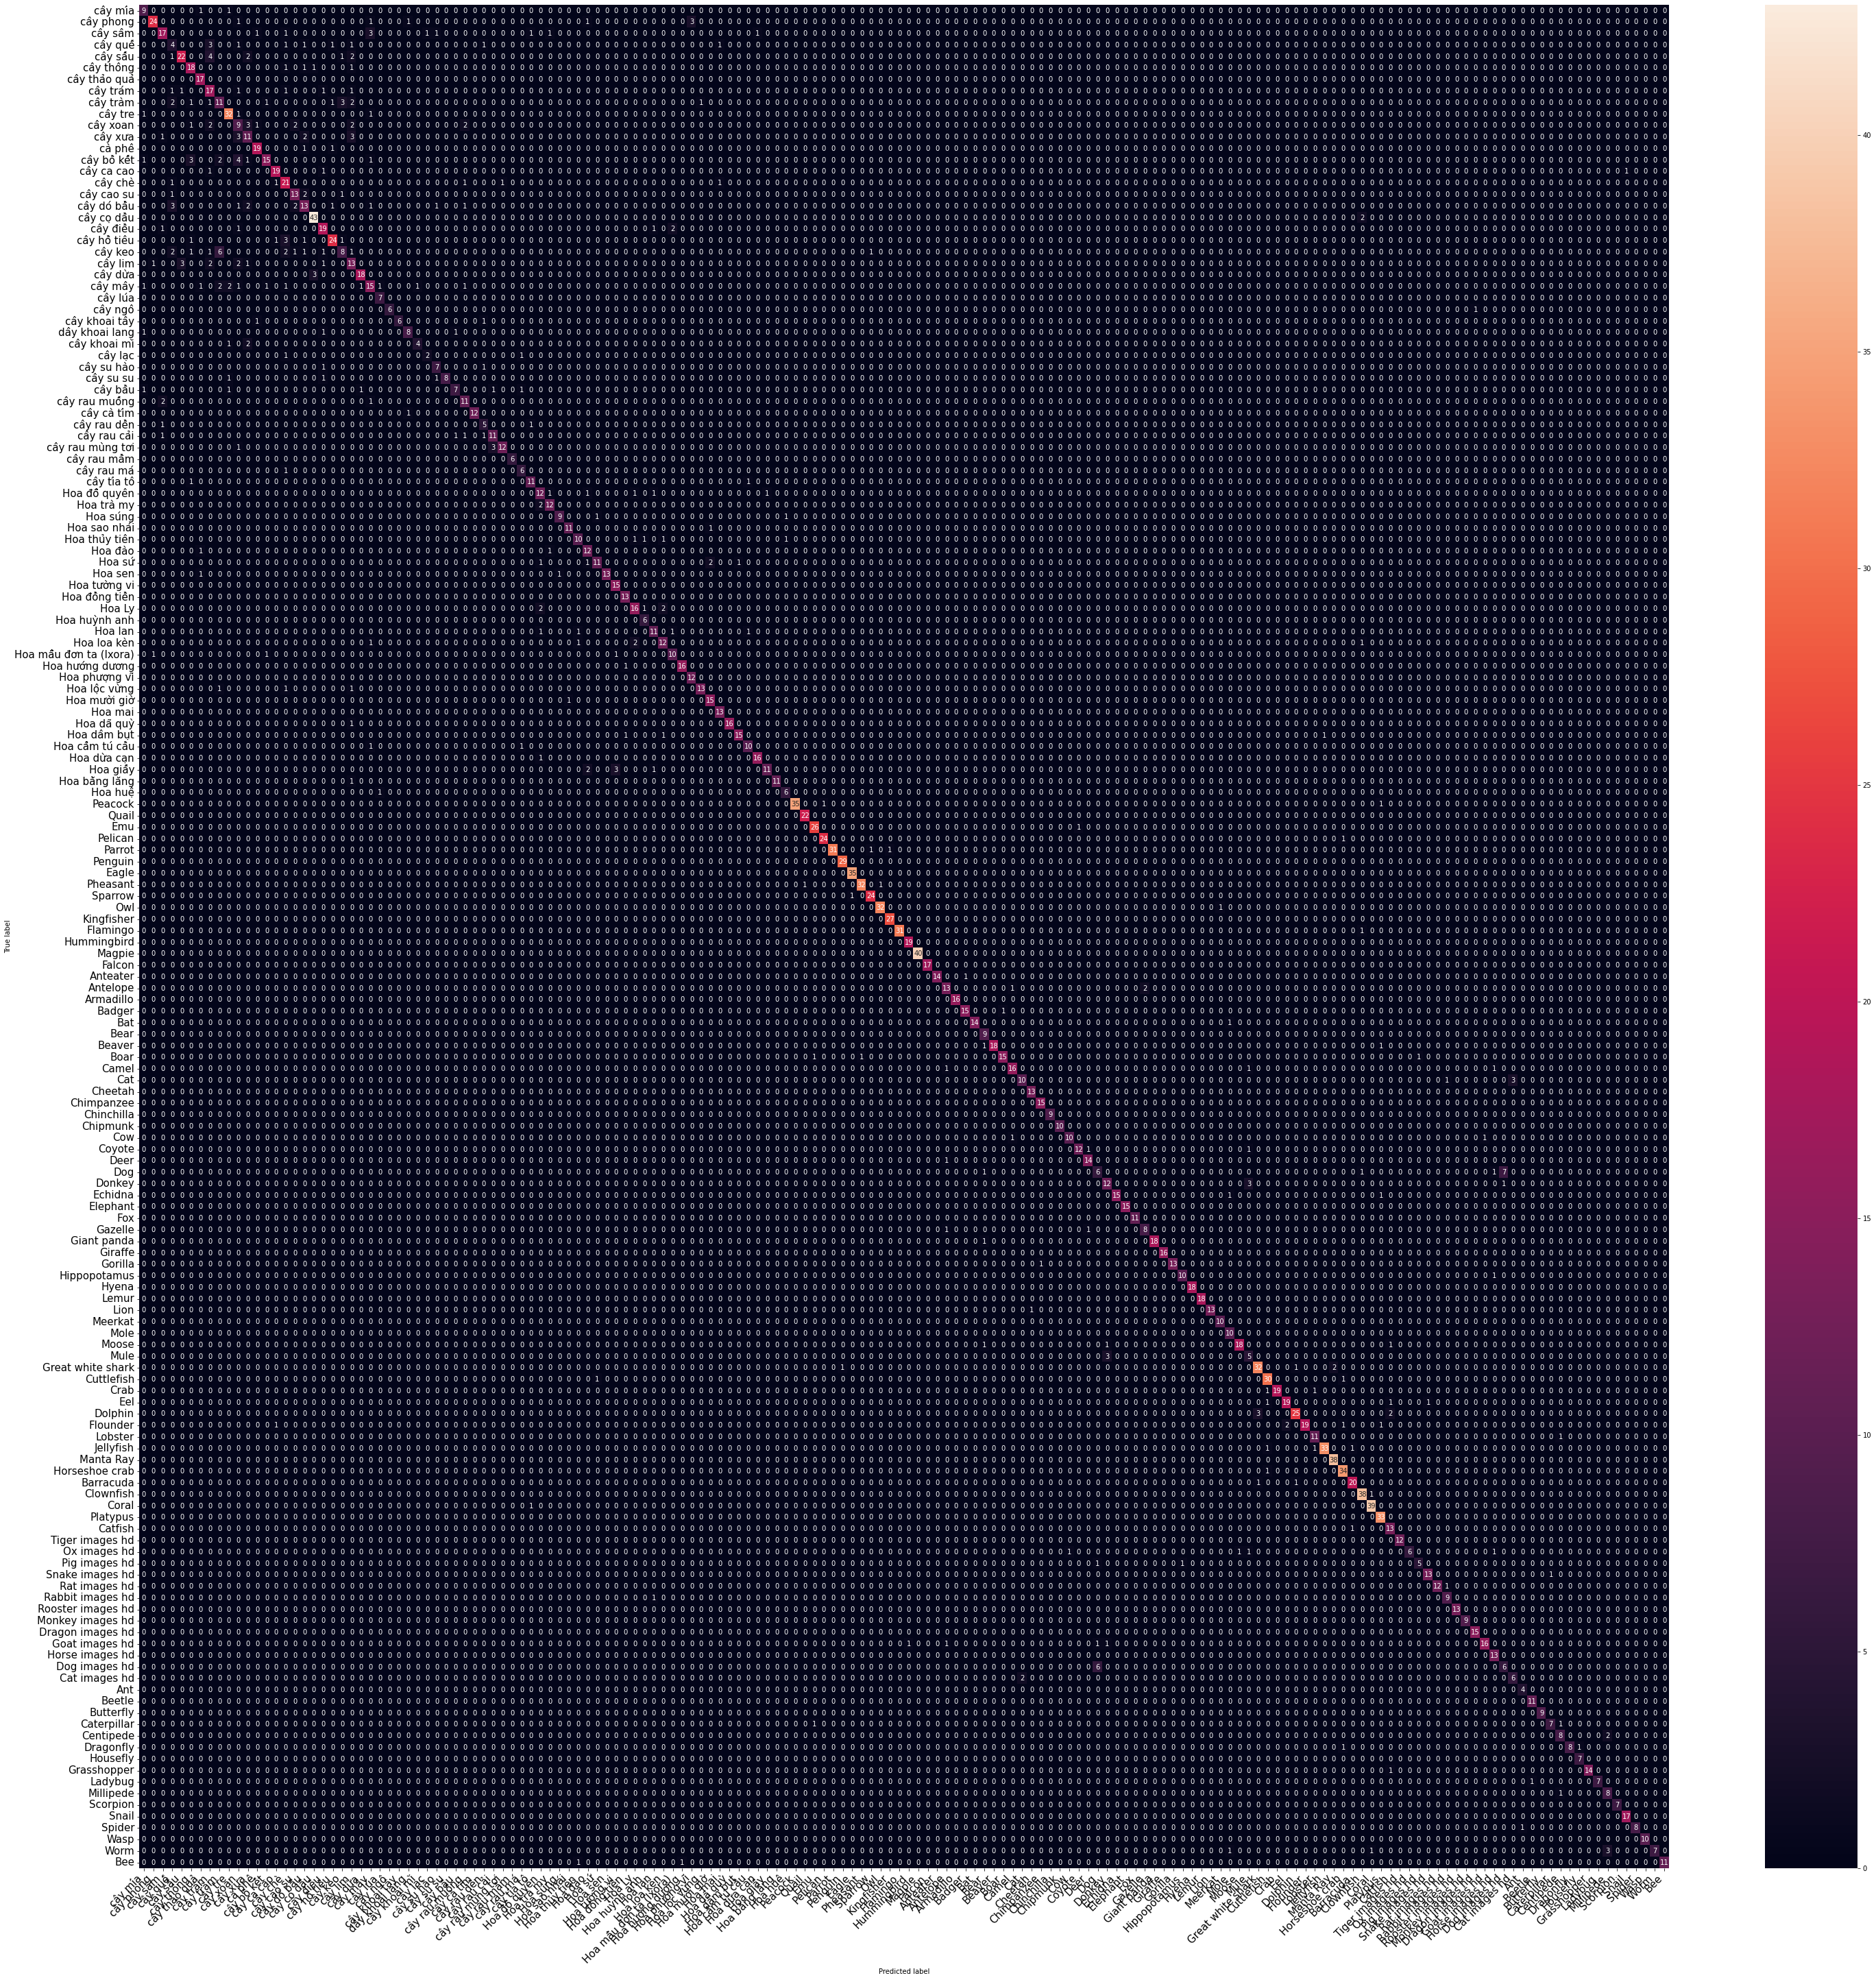

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(50,50))

class_names = list(label2num.keys())
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
with open('confusion_matrix.pkl', 'wb') as f:
  pickle.dump(confusion_matrix, f)

In [ ]:
with open('confusion_matrix.pkl', 'rb') as f:
  cm = pickle.load(f)

cm

array([[ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 24.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  7.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 11.]])